In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

# Importing the dataset


dataset = pd.read_csv('heart.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 13].values


In [3]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(X[:,11:13])
X[:,11:13]=imputer.transform(X[:,11:13])

In [4]:
#splitting dataset into training set and test set

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, y, test_size = 0.10, random_state = 23)

In [5]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [6]:
#Explorig the dataset
dataset.value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
38   1    2   138       175   0    1        173      0      0.0      2      4   2     1         2
59   1    0   110       239   0    0        142      1      1.2      1      1   3     0         1
          2   126       218   1    1        134      0      2.2      1      1   1     0         1
          1   140       221   0    1        164      1      0.0      2      0   2     1         1
          0   170       326   0    0        140      1      3.4      0      0   3     0         1
                                                                                               ..
51   1    2   94        227   0    1        154      1      0.0      2      1   3     1         1
          0   140       299   0    1        173      1      1.6      2      0   3     0         1
                        298   0    1        122      1      4.2      1      3   3     0         1
                        2

# Logistic Regression

In [7]:
#fitting LR to training set

from sklearn.linear_model import LogisticRegression
classifier =LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()

In [8]:
#Predict the test set results

y_pred=classifier.predict(X_test)

In [9]:
#checking the accuracy for predicted results

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9032258064516129

In [10]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [11]:
#Interpretation:

from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        17
           1       0.87      0.93      0.90        14

    accuracy                           0.90        31
   macro avg       0.90      0.91      0.90        31
weighted avg       0.91      0.90      0.90        31



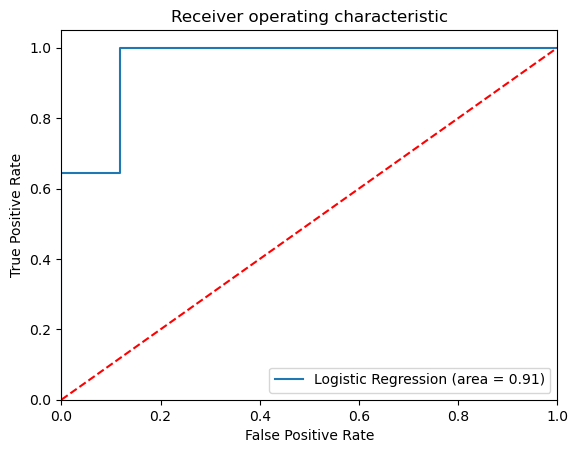

In [12]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [13]:
##PREDICTION FOR NEW DATASET

Newdataset = pd.read_csv('newdata.csv')
ynew=classifier.predict(Newdataset)
print("Predicted Class for newdata.csv:",ynew)

Predicted Class for newdata.csv: [0]


C:\Users\91626\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# Decision Tree

In [14]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 8)
classifier.fit(X_train, Y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

#ACCURACY SCORE
from sklearn.metrics import accuracy_score
print("ACC",accuracy_score(Y_test,y_pred))

##CONFUSION MATRIX
from sklearn.metrics import classification_report, confusion_matrix  
cm=confusion_matrix(Y_test, y_pred) 

#Interpretation:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))


ACC 0.8709677419354839
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.86      0.86      0.86        14

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



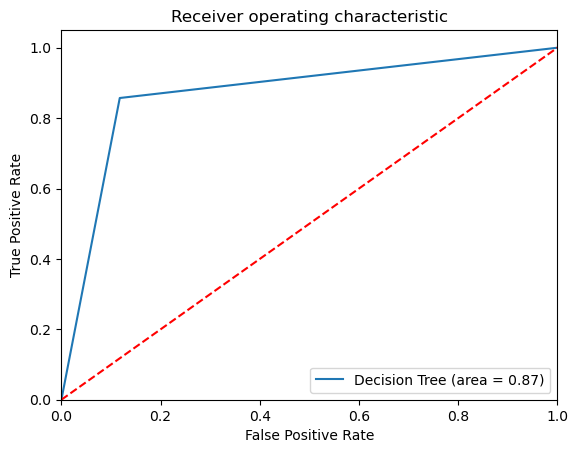

In [15]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [16]:
##PREDICTION FOR NEW DATASET

Newdataset = pd.read_csv('newdata.csv')
ynew=classifier.predict(Newdataset)
print("Predicted Class for newdata.csv:",ynew)

Predicted Class for newdata.csv: [0]


C:\Users\91626\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


# Naive Bayes

In [17]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)



# Predicting the Test set results
y_pred = classifier.predict(X_test)

#ACCURACY SCORE
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)


#Interpretation:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        17
           1       0.82      1.00      0.90        14

    accuracy                           0.90        31
   macro avg       0.91      0.91      0.90        31
weighted avg       0.92      0.90      0.90        31



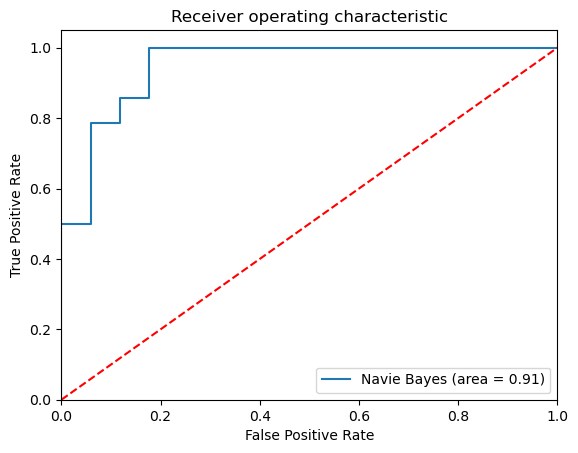

In [18]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Navie Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [19]:
##PREDICTION FOR NEW DATASET

Newdataset = pd.read_csv('newdata.csv')
ynew=classifier.predict(Newdataset)
print("Predicted Class for newdata.csv:",ynew)

Predicted Class for newdata.csv: [1]


C:\Users\91626\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


# KNN

In [20]:
# Fitting Naive Bayes to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, Y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

#ACCURACY SCORE
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)


#Interpretation:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.86      0.86      0.86        14

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



C:\Users\91626\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


C:\Users\91626\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


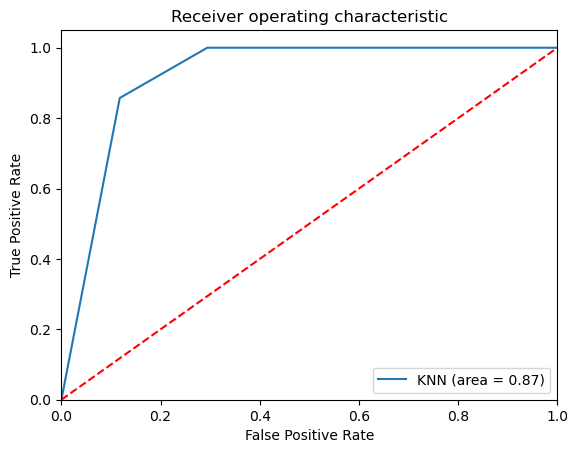

In [21]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [22]:
##PREDICTION FOR NEW DATASET

Newdataset = pd.read_csv('newdata.csv')
ynew=classifier.predict(Newdataset)
print("Predicted Class for newdata.csv:",ynew)

Predicted Class for newdata.csv: [1]


C:\Users\91626\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\91626\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Random Forest

In [23]:
# Fitting Naive Bayes to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier =RandomForestClassifier(n_estimators=20)
classifier.fit(X_train, Y_train)



# Predicting the Test set results
y_pred = classifier.predict(X_test)


from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

#Interpretation:

from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.86      0.86      0.86        14

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



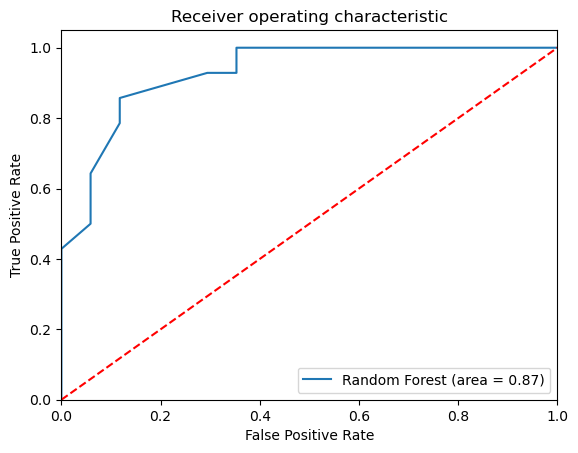

In [24]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [25]:
##PREDICTION FOR NEW DATASET

Newdataset = pd.read_csv('newdata.csv')
ynew=classifier.predict(Newdataset)
print("Predicted Class for newdata.csv:",ynew)

Predicted Class for newdata.csv: [1]


C:\Users\91626\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


# Support Vector Machine

In [26]:
##SUPPORT VECTOR CLASSIFICATIONS

##checking for different kernels

from sklearn.svm import SVC


classifier = SVC(kernel = 'linear', random_state = 0 ,probability=True)
classifier.fit(X_train, Y_train)


# Predicting the Test set results

y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

#Interpretation:

from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.88      1.00      0.93        14

    accuracy                           0.94        31
   macro avg       0.94      0.94      0.94        31
weighted avg       0.94      0.94      0.94        31



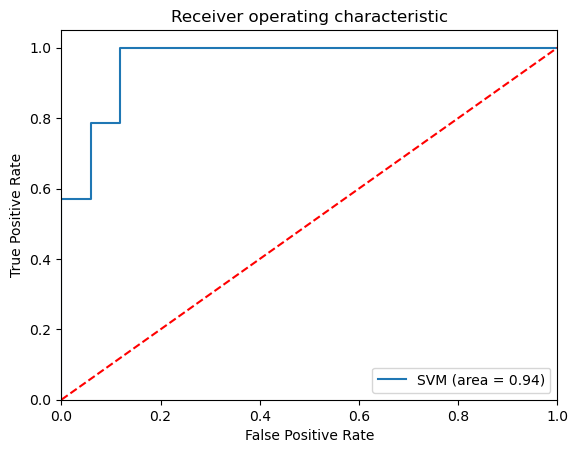

In [27]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [28]:
##PREDICTION FOR NEW DATASET

Newdataset = pd.read_csv('newdata.csv')
ynew=classifier.predict(Newdataset)
print("Predicted Class for newdata.csv:",ynew)

Predicted Class for newdata.csv: [0]


C:\Users\91626\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [29]:
from copy import deepcopy


class ModelTree(object):

    def __init__(self, model, max_depth=5, min_samples_leaf=10):

        self.model = model
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.tree = None



    # ======================
    # Fit
    # ======================
    def fit(self, X, y, verbose=False):

        # Settings
        model = self.model
        min_samples_leaf = self.min_samples_leaf
        max_depth = self.max_depth



        if verbose:
            print(" max_depth={}, min_samples_leaf={}...".format(max_depth, min_samples_leaf))

        def _build_tree(X, y):

            global index_node_global

            def _create_node(X, y, depth, container):
                loss_node, model_node = _fit_model(X, y, model)
                node = {"name": "node",
                        "index": container["index_node_global"],
                        "loss": loss_node,
                        "model": model_node,
                        "data": (X, y),
                        "n_samples": len(X),
                        "j_feature": None,
                        "threshold": None,
                        "children": {"left": None, "right": None},
                        "depth": depth}
                container["index_node_global"] += 1
                return node

            # Recursively split node + traverse node until a terminal node is reached
            def _split_traverse_node(node, container):

                # Perform split and collect result
                result = _splitter(node, model, max_depth=max_depth,min_samples_leaf=min_samples_leaf)

                # Return terminal node if split is not advised
                if not result["did_split"]:
                    if verbose:
                        depth_spacing_str = " ".join([" "] * node["depth"])
                        print(" {}*leaf {} @ depth {}: loss={:.6f}, N={}".format(depth_spacing_str, node["index"], node["depth"], node["loss"], result["N"]))
                    return

                # Update node information based on splitting result
                node["j_feature"] = result["j_feature"]
                node["threshold"] = result["threshold"]
                del node["data"]  # delete node stored data

                # Extract splitting results
                (X_left, y_left), (X_right, y_right) = result["data"]
                model_left, model_right = result["models"]

                # Report created node to user
                if verbose:
                    depth_spacing_str = " ".join([" "] * node["depth"])
                    print(" {}node {} @ depth {}: loss={:.6f}, j_feature={}, threshold={:.6f}, N=({},{})".format(depth_spacing_str, node["index"], node["depth"], node["loss"], node["j_feature"], node["threshold"], len(X_left), len(X_right)))

                # Create children nodes
                node["children"]["left"] = _create_node(X_left, y_left, node["depth"]+1, container)
                node["children"]["right"] = _create_node(X_right, y_right, node["depth"]+1, container)
                node["children"]["left"]["model"] = model_left
                node["children"]["right"]["model"] = model_right

                # Split nodes
                _split_traverse_node(node["children"]["left"], container)
                _split_traverse_node(node["children"]["right"], container)

            container = {"index_node_global": 0}  # mutatable container
            root = _create_node(X, y, 0, container)  # depth 0 root node
            _split_traverse_node(root, container)  # split and traverse root node

            return root

        # Construct tree
        self.tree = _build_tree(X, y)
        return self.tree

    # ======================
    # Predict
    # ======================
    def predict(self, X):
        assert self.tree is not None
        def _predict(node, x):
            no_children = node["children"]["left"] is None and \
                          node["children"]["right"] is None
            if no_children:
                y_pred_x = node["model"].predict([x])[0]
                return y_pred_x
            else:
                if x[node["j_feature"]] <= node["threshold"]:  # x[j] < threshold
                    return _predict(node["children"]["left"], x)
                else:  # x[j] > threshold
                    return _predict(node["children"]["right"], x)
        y_pred = np.array([_predict(self.tree, x) for x in X])
        return y_pred



    # ======================
    # Loss
    # ======================
    def loss(self, X, y, y_pred):
        loss = self.model.loss(X, y, y_pred)
        return loss






def _splitter(node, model,max_depth=5, min_samples_leaf=10):

    # Extract data
    X, y = node["data"]
    depth = node["depth"]
    N, d = X.shape

    # Find feature splits that might improve loss
    did_split = False
    loss_best = node["loss"]
    data_best = None
    models_best = None
    j_feature_best = None
    threshold_best = None

    # Perform threshold split search only if node has not hit max depth
    if (depth >= 0) and (depth < max_depth):

        for j_feature in range(d):



            threshold_search = []

            for i in range(N):
                threshold_search.append(X[i, j_feature])


            # Perform threshold split search on j_feature
            for threshold in threshold_search:

                # Split data based on threshold
                (X_left, y_left), (X_right, y_right) = _split_data(j_feature, threshold, X, y)
                N_left, N_right = len(X_left), len(X_right)

                # Splitting conditions
                split_conditions = [N_left >= min_samples_leaf,
                                    N_right >= min_samples_leaf]

                # Do not attempt to split if split conditions not satisfied
                if not all(split_conditions):
                    continue

                # Compute weight loss function
                loss_left, model_left = _fit_model(X_left, y_left, model)
                loss_right, model_right = _fit_model(X_right, y_right, model)
                loss_split = (N_left*loss_left + N_right*loss_right) / N

                # Update best parameters if loss is lower
                if loss_split < loss_best:
                    did_split = True
                    loss_best = loss_split
                    models_best = [model_left, model_right]
                    data_best = [(X_left, y_left), (X_right, y_right)]
                    j_feature_best = j_feature
                    threshold_best = threshold

    # Return the best result
    result = {"did_split": did_split,
              "loss": loss_best,
              "models": models_best,
              "data": data_best,
              "j_feature": j_feature_best,
              "threshold": threshold_best,
              "N": N}

    return result

def _fit_model(X, y, model):
    model_copy = deepcopy(model)  # must deepcopy the model!
    model_copy.fit(X,y)
    y_pred = model_copy.predict(X)
    loss = model_copy.loss(X, y, y_pred)
    assert loss >= 0.0
    return loss, model_copy

def _split_data(j_feature, threshold, X, y):
    idx_left = np.where(X[:, j_feature] <= threshold)[0]
    idx_right = np.delete(np.arange(0, len(X)), idx_left)

    assert len(idx_left) + len(idx_right) == len(X)
    return (X[idx_left], y[idx_left]), (X[idx_right], y[idx_right])


In [30]:


import numpy as np
from sklearn.metrics import mean_squared_error

class logistic_regr:

    def __init__(self):
        from sklearn.linear_model import LogisticRegression
        self.model = LogisticRegression(penalty="l2",solver='liblinear')
        self.flag = False
        self.flag_y_pred = None

    def fit(self, X, y):
        y_unique = list(set(y))
        if len(y_unique) == 1:
            self.flag = True
            self.flag_y_pred = y_unique[0]
        else:
            self.model.fit(X, y)

    def predict(self, X):
        if self.flag:
            return self.flag_y_pred * np.ones((len(X),), dtype=int)
        else:
            return self.model.predict(X)

    def loss(self, X, y, y_pred):
        return mean_squared_error(y, y_pred)

    def predict_proba(self,X):
        return self.model.predict_proba(X)




#No of decisioin Trees
esitmators=5
y_pred=[]
n_train_split=int(len(X_train)/esitmators)
inital_train=0
final_train=0


yy_pred=[]
classifier=None

for i in range(1,esitmators+1):

    classifier =logistic_regr()

    final_train=i*n_train_split
    temp_X_train=X_train[inital_train:final_train]
    temp_y_train=Y_train[inital_train:final_train]


    L=ModelTree(classifier,max_depth=20, min_samples_leaf=10)

    node=L.fit(temp_X_train,temp_y_train,verbose=False)
    classifier=node["model"]

    y_pred_temp=L.predict(X_test)
    yy_pred.append(y_pred_temp)

for j in range(len(yy_pred[0])):
    curr=[]
    for i in range(len(yy_pred)):
        curr.append(yy_pred[i][j])
    a=curr.count(0)
    b=curr.count(1)
    if a>b:
        y_pred.append(0)
    else:
        y_pred.append(1)


#ACCURACY SCORE
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)


#Interpretation:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))





              precision    recall  f1-score   support

           0       0.94      0.88      0.91        17
           1       0.87      0.93      0.90        14

    accuracy                           0.90        31
   macro avg       0.90      0.91      0.90        31
weighted avg       0.91      0.90      0.90        31



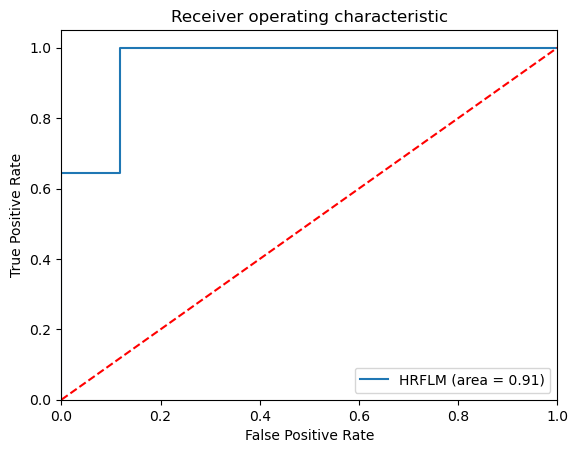

In [31]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, y_pred)
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='HRFLM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()